### Ingest Data

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files, drive
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from PIL import Image
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report 
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.cluster import KMeans

In [44]:
!wget https://github.com/erinmcmahon26/MNIST-Digit-Recognizer-Kaggle-Competition/archive/refs/heads/main.zip 

--2022-02-13 18:26:13--  https://github.com/erinmcmahon26/MNIST-Digit-Recognizer-Kaggle-Competition/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/erinmcmahon26/MNIST-Digit-Recognizer/archive/refs/heads/main.zip [following]
--2022-02-13 18:26:13--  https://github.com/erinmcmahon26/MNIST-Digit-Recognizer/archive/refs/heads/main.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/erinmcmahon26/MNIST-Digit-Recognizer/zip/refs/heads/main [following]
--2022-02-13 18:26:13--  https://codeload.github.com/erinmcmahon26/MNIST-Digit-Recognizer/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.121.9
Connecting to codeload.github.com (codeload.github.com)|140.82.121.9|:443... connected.
HTTP 

In [45]:
!unzip "/content/main.zip" -d "/content/output_folder/"

Archive:  /content/main.zip
07fb947b1f410069cac91bff6a6d463528ca4a2e
replace /content/output_folder/MNIST-Digit-Recognizer-main/MNIST_Digit_Recognizer_Kaggle_Competition.ipynb? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/output_folder/MNIST-Digit-Recognizer-main/MNIST_Digit_Recognizer_Kaggle_Competition.ipynb  
replace /content/output_folder/MNIST-Digit-Recognizer-main/README.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/output_folder/MNIST-Digit-Recognizer-main/README.md  
replace /content/output_folder/MNIST-Digit-Recognizer-main/test.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: /content/output_folder/MNIST-Digit-Recognizer-main/test.csv.zip  
replace /content/output_folder/MNIST-Digit-Recognizer-main/train.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: /content/output_folder/MNIST-Digit-Recognizer-main/train.csv.zip  


In [46]:
!unzip "/content/output_folder/MNIST-Digit-Recognizer-main/test.csv.zip" -d "/content/output_folder/MNIST-Digit-Recognizer-main/csvs"

Archive:  /content/output_folder/MNIST-Digit-Recognizer-main/test.csv.zip
replace /content/output_folder/MNIST-Digit-Recognizer-main/csvs/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/output_folder/MNIST-Digit-Recognizer-main/csvs/test.csv  


In [47]:
!unzip "/content/output_folder/MNIST-Digit-Recognizer-main/train.csv.zip" -d "/content/output_folder/MNIST-Digit-Recognizer-main/csvs"

Archive:  /content/output_folder/MNIST-Digit-Recognizer-main/train.csv.zip
replace /content/output_folder/MNIST-Digit-Recognizer-main/csvs/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/output_folder/MNIST-Digit-Recognizer-main/csvs/train.csv  


In [48]:
df_train = pd.read_csv('/content/output_folder/MNIST-Digit-Recognizer-main/csvs/train.csv')

In [49]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
df_test = pd.read_csv('/content/output_folder/MNIST-Digit-Recognizer-main/csvs/test.csv')

In [51]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### EDA

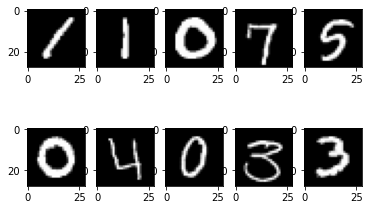

In [52]:
X = df_train.iloc[:,1:].values / 255 
y = df_train.iloc[:,0].values

fig,ax = plt.subplots(2,5)
for i in range(10):
    nparray = X[i].reshape(28,28)
    image = Image.fromarray(nparray * 255)
    ax[i%2][i//2].imshow(image)
fig.show()

Splitting the training data into X and y variables.

In [53]:
y = df_train['label'].values
X = df_train.drop(columns = ['label']).values

In [54]:
print(X.shape)
print(y.shape)

(42000, 784)
(42000,)


label is 9


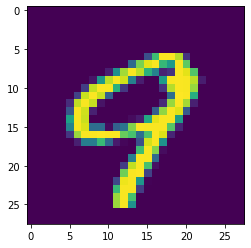

In [55]:
X_square = X.reshape(-1, 28, 28)
index = 100
plt.imshow(X_square[100])
print(f"label is {y[100]}")

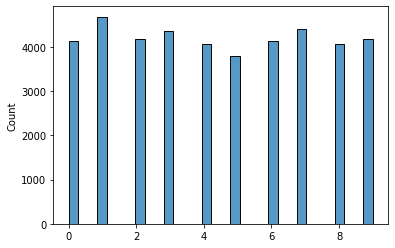

In [56]:
sns.histplot(y)

In [57]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([4132, 4684, 4177, 4351, 4072, 3795, 4137, 4401, 4063, 4188]))

This is showing that we have 10 unique values ranging from 0-9. Showing a fairly even distribution.

In [58]:
df_train['pixel34'].value_counts()

0      41995
85         1
2          1
157        1
132        1
67         1
Name: pixel34, dtype: int64

In [59]:
X_square = X_square / 255.
X = X / 255.

Pixel values can range from 0-255 which corresponds to colors on the screen. Working with large numbers can be hard on the models, dividing by 255 will normalize it. PCA is affected by scale, so we need to scale or normalize prior to running the features through PCA. 

In [60]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

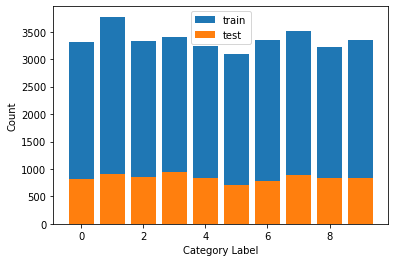

In [61]:
labels, count = np.unique(y_train, return_counts=True)
plt.bar(labels, count, label = "train")
labels, count = np.unique(y_test, return_counts = True)
plt.bar(labels, count, label = "test")
plt.xlabel("Category Label")
plt.ylabel("Count")
plt.legend()

Still have a good distribution of numbers in our training and testing set. 

#### PCA

In [62]:
pca = PCA(n_components=0.95)
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

components_: holds the unit vector that defines the first principal component

explained_variance_ratio_: states the proportion of the variance that lies along each principal component

Setting n_components = 0.95 (or other number if desired) to indicating the ratio of variance you would like to keep

In [63]:
x_train_pca.shape

(33600, 153)

PCA took us from 785 features down to 153 features, stating that 153 features represent 95% of the variance in the data. 

Text(0, 0.5, 'Explained Variance')

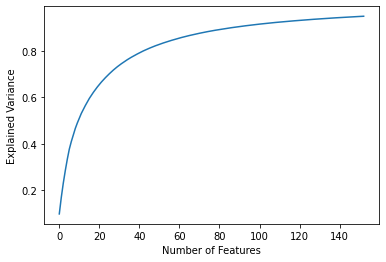

In [64]:
plt.plot(cumsum)
plt.xlabel("Number of Features")
plt.ylabel("Explained Variance")

### Models

In [65]:
def model_metrics(model, xtest, ytest):
  start = time.time()
  y_pred = model.predict(xtest)
  end = time.time()
  cm = confusion_matrix(ytest, y_pred)
  print("Accuracy Score:", accuracy_score(ytest, y_pred))
  print("Report:", classification_report(ytest, y_pred))
  print(f"Elapsed Time: {end - start: .4f} second")
  sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")

#### Random Forest

##### All Features Included

Accuracy Score: 0.9635714285714285
Report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99       816
           1       0.98      0.99      0.99       909
           2       0.97      0.96      0.96       846
           3       0.96      0.94      0.95       937
           4       0.96      0.97      0.96       839
           5       0.96      0.95      0.96       702
           6       0.97      0.98      0.97       785
           7       0.97      0.96      0.96       893
           8       0.96      0.96      0.96       835
           9       0.93      0.94      0.93       838

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400

Elapsed Time:  0.3491 second


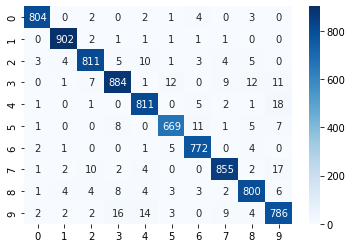

In [66]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

model_metrics(rfc, x_test, y_test)

In [67]:
test_features = df_test.values/255

In [69]:
# create submission:
#test_pred = rfc.predict(test_features)
#output1 = pd.DataFrame({'ImageId': df_test.index+1,
#                        'label': test_pred})
#output1.to_csv("RF_nopca.csv", index=False)

##### Features from PCA

Accuracy Score: 0.9397619047619048
Report:               precision    recall  f1-score   support

           0       0.97      0.98      0.97       816
           1       0.98      0.98      0.98       909
           2       0.95      0.93      0.94       846
           3       0.91      0.91      0.91       937
           4       0.94      0.95      0.94       839
           5       0.91      0.93      0.92       702
           6       0.95      0.98      0.96       785
           7       0.96      0.94      0.95       893
           8       0.91      0.89      0.90       835
           9       0.91      0.92      0.91       838

    accuracy                           0.94      8400
   macro avg       0.94      0.94      0.94      8400
weighted avg       0.94      0.94      0.94      8400

Elapsed Time:  0.2631 second


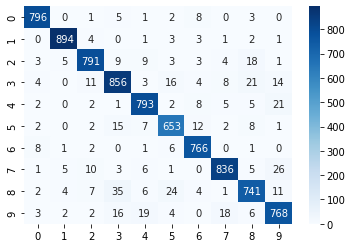

In [72]:
rfc_pca = RandomForestClassifier()
rfc_pca.fit(x_train_pca, y_train)

model_metrics(rfc_pca, x_test_pca, y_test)

After applying the features picked using PCA, the model was able to train more quickly (about 0.11 seconds faster) but the overall accuracy was lower. It is possible that even though PCA can select important features, that the Random Forest Classifier is more capable of selecting features for itself versus having another algorithm do it instead. 

In [74]:
# pca for test dataset 
pca = PCA(n_components=0.95)
pca.fit(test_features)
cumsum = np.cumsum(pca.explained_variance_ratio_)
test_features_pca = pca.fit_transform(test_features)

In [75]:
# create submission:
test_pred_pca = rfc_pca.predict(test_features_pca)
output2 = pd.DataFrame({'ImageId': df_test.index+1,
                        'label': test_pred_pca})
output2.to_csv("RF_pca.csv", index=False)

#### K-Means Clustering

Accuracy Score: 0.022976190476190476
Report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00       816
           1       0.03      0.01      0.01       909
           2       0.03      0.01      0.02       846
           3       0.01      0.00      0.00       937
           4       0.01      0.00      0.00       839
           5       0.82      0.23      0.36       702
           6       0.02      0.01      0.01       785
           7       0.00      0.00      0.00       893
           8       0.02      0.01      0.01       835
           9       0.00      0.00      0.00       838
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


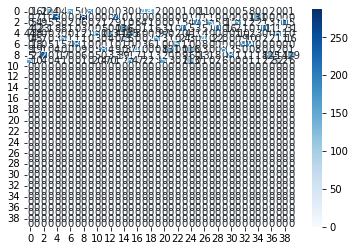

In [42]:
kmeans = KMeans(n_clusters=40)
kmeans.fit(x_train)

model_metrics(kmeans, x_test, y_test)

### Conculsion

There will be a little quality loss of the images but the numbers should still be good enough for the model to decipher after compression the training set. Not sure why I wrote this....

This is like a shadow of a person walking around aka 3D - compressing the signal into a shadow. You are removing noise so you have a higher signal. You can use it to improve clustering. Do this because of the curse of dimenstionality. The more dimentionality you have, the less understanding you have. Makes clustering possible with high dimensional data. Also good for removing noise, get a more clear picture. Issue with Big data, you might not be able to do clustering because of computational amount of processing. 